In [ ]:
import pandas as pd
import json
import csv

outfile = open("/content/drive/MyDrive/180/review_stars.tsv", 'w')
sfile = csv.writer(outfile, delimiter="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id', 'stars', 'text'])

with open('/content/drive/MyDrive/180/review.json', encoding="utf-8") as f:
    for line in f:
        row = json.loads(line)
        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
outfile.close()

df = pd.read_csv('/content/drive/MyDrive/180/review_stars.tsv', delimiter = "\t", encoding="utf-8")
df.head()

,business_id,stars,text
0,buF9druCkbuXLX526sGELQ,4.0,"b""Apparently Prides Osteria had a rough summer..."
1,RA4V8pr014UyUbDvI-LW2A,4.0,b'This store is pretty good. Not as great as W...
2,_sS2LBIGNT5NQb6PD1Vtjw,5.0,"b""I called WVM on the recommendation of a coup..."
3,0AzLzHfOJgL7ROwhdww2ew,2.0,"b""I've stayed at many Marriott and Renaissance..."
4,8zehGz9jnxPqXtOc7KaJxA,4.0,"b""The food is always great here. The service f..."


In [ ]:
df.shape

(8635403, 3)

In [ ]:
df_review_agg = df.groupby('business_id')['text'].sum()


In [ ]:
df.shape

(8635403, 3)

In [ ]:
df_review_agg.head()

business_id
--0DF12EMHYI8XIgoFha6A    b"Being from Chicago originally and moving thi...
--0r8K_AQ4FZfLsX3ZYRDA    b'Quick and reasonably priced service. Dropped...
--0zrn43LEaB4jUWTQH_Bg    b'-Rude staff and management. \n-They do not v...
--164t1nclzzmca7eDiJMw    b'Banh mi was pretty weak.'b'Incredibly good f...
--2aF9NhXnNVpDV0KS3xBQ    b'I recently moved to Delaney Park, and Spence...
Name: text, dtype: object

In [ ]:
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 
                                     'all_reviews': df_review_agg.values})

In [ ]:
df_ready_for_sklearn.head()

,business_id,all_reviews
0,--0DF12EMHYI8XIgoFha6A,"b""Being from Chicago originally and moving thi..."
1,--0r8K_AQ4FZfLsX3ZYRDA,b'Quick and reasonably priced service. Dropped...
2,--0zrn43LEaB4jUWTQH_Bg,b'-Rude staff and management. \n-They do not v...
3,--164t1nclzzmca7eDiJMw,b'Banh mi was pretty weak.'b'Incredibly good f...
4,--2aF9NhXnNVpDV0KS3xBQ,"b'I recently moved to Delaney Park, and Spence..."


In [ ]:
business = pd.read_json('/content/drive/MyDrive/180/business.json', lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [ ]:
business=business[business['review_count']>20]
business.head()
business.shape

(70682, 14)

In [ ]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [ ]:
#business.drop('is_open', 1, inplace=True)
#business.drop('city', 1, inplace=True)
#business.drop('state', 1, inplace=True)
#business.drop('latitude', 1, inplace=True)
#business.drop('longitude', 1, inplace=True)
#business.drop('postal_code', 1, inplace=True)
#business.drop('attributes', 1, inplace=True)
#business.drop('name', 1, inplace=True)
#business.drop('categories', 1, inplace=True)
#business.drop('hours', 1, inplace=True)
#business.drop('address', 1, inplace=True)

In [ ]:
business.head()

,business_id,stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,4.0,126
5,D4JtQNTI4X3KcbzacDJsMw,3.5,169
8,N3_Gs3DnX4k9SgpwJxdEfw,5.0,30
12,HPA_qyMEddpAEtFof02ixg,4.0,39


In [ ]:
merged_df = pd.merge (df_ready_for_sklearn, business, on='business_id')
merged_df.head()

,business_id,all_reviews,stars,review_count
0,--164t1nclzzmca7eDiJMw,b'Banh mi was pretty weak.'b'Incredibly good f...,4.0,137
1,--6COJIAjkQwSUZci_4PJQ,b'Casually comfortable and pleasant environmen...,4.0,99
2,--JKSSgnfoOjVDFGv692BA,b'Fast service. $15 bucks and I was outta ther...,4.0,25
3,--Q3mAcX9t63f7Xcbn7LVA,b'this place was truly amazing place!from the ...,4.5,107
4,--TEGvhgrXwHnRjiFbK08Q,"b""I have been getting facials from Danica for ...",5.0,21


In [ ]:
import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.TfidfVectorizer(max_features=2000,
                                     min_df=50)
matrix = vectorizer.fit_transform(merged_df.all_reviews)

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '20',
 '24',
 '25',
 '2nd',
 '30',
 '35',
 '40',
 '45',
 '50',
 '60',
 '75',
 '90',
 '95',
 '99',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'accommodate',
 'accommodating',
 'account',
 'across',
 'actual',
 'actually',
 'add',
 'added',
 'addition',
 'additional',
 'admit',
 'advance',
 'advice',
 'affordable',
 'after',
 'afternoon',
 'again',
 'against',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'air',
 'airport',
 'al',
 'alcohol',
 'all',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'ambiance',
 'ambience',
 'american',
 'amount',
 'an',
 'and',
 'annoying',
 'another',
 'answer',
 'answered',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'apologized',
 'app',
 'apparently',
 'appetizer',
 'appetizers',
 'apple',
 'appointment',
 'appreciate',
 'appreciated',
 'apps'

In [ ]:
from collections.abc import Sequence
from sklearn import preprocessing

def to_xy(df, target):
  result = []
  for x in df.columns:
    if x != target:
      result.append(x)
  #find out the type of the target column.
  target_type = df[target].dtypes
  target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
  #Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
  if target_type in (np.int64, np.int32):
    #Classification
    dummies = pd.get_dummies(df[target])
    return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
  else:
    #Regression
    return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


#Regression chart.
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  a = plt.plot(t['y'].tolist(), label = 'expeccted')
  b = plt.plot(t['pred'].tolist(), label ='prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()

#Encode text values to dummy variables
def encode_text_dummy(df, name):
  dummies = pd.get_dummies(df[name])
  for x in dummies.columns:
    dummy_name = "{}-{}".format(name, x)
    df[dummy_name] = dummies[x]
  df.drop(name, axis=1, inplace=True)

#Encode text values to indexes
def encode_text_index(df, name):
  le = preprocessing.LabelEncoder()
  df[name] = le.fit_transform(df[name])
  return le.classes_


1) Activation: **relu** Optimizer: **adam**

---



In [ ]:
import numpy as np
import tensorflow as tf
import keras
import sklearn
import io
import os
import requests
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
save_path = "./dnn"
tfidf_data = matrix.toarray()
stars = merged_df.stars.to_numpy()

#x,y =  to_xy(matrix, merged_df.stars)
x_train, x_test, y_train, y_test = train_test_split(tfidf_data, stars, test_size=0.20, random_state=42)
checkpointer = ModelCheckpoint(filepath ="./best_weights.hdf5", verbose=0, save_best_only=True)
for i in range(5):
  print(i)
  model = Sequential()
  model.add(Dense(20, input_dim = tfidf_data.shape[1], activation='relu'))
  model.add(Dense(10))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

  model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor, checkpointer], verbose=2, epochs=1000)

print('Training finished...Loading the best model')
print()
model.load_weights('./best_weights.hdf5')
#Predict
pred = model.predict(x_test)
#RMSE score
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("RMSE score: {}".format(score))

model.save(os.path.join(save_path, "network.hdf5"))

0
Epoch 1/1000
1768/1768 - 4s - loss: 0.3644 - val_loss: 0.0884 - 4s/epoch - 2ms/step
Epoch 2/1000
1768/1768 - 4s - loss: 0.0812 - val_loss: 0.0806 - 4s/epoch - 2ms/step
Epoch 3/1000
1768/1768 - 4s - loss: 0.0766 - val_loss: 0.0780 - 4s/epoch - 2ms/step
Epoch 4/1000
1768/1768 - 3s - loss: 0.0745 - val_loss: 0.0811 - 3s/epoch - 2ms/step
Epoch 5/1000
1768/1768 - 3s - loss: 0.0733 - val_loss: 0.0780 - 3s/epoch - 2ms/step
Epoch 6/1000
1768/1768 - 3s - loss: 0.0727 - val_loss: 0.0763 - 3s/epoch - 2ms/step
Epoch 7/1000
1768/1768 - 4s - loss: 0.0721 - val_loss: 0.0758 - 4s/epoch - 2ms/step
Epoch 8/1000
1768/1768 - 4s - loss: 0.0715 - val_loss: 0.0820 - 4s/epoch - 2ms/step
Epoch 9/1000
1768/1768 - 4s - loss: 0.0705 - val_loss: 0.0780 - 4s/epoch - 2ms/step
Epoch 10/1000
1768/1768 - 3s - loss: 0.0700 - val_loss: 0.0740 - 3s/epoch - 2ms/step
Epoch 11/1000
1768/1768 - 4s - loss: 0.0692 - val_loss: 0.0743 - 4s/epoch - 2ms/step
Epoch 12/1000
1768/1768 - 3s - loss: 0.0683 - val_loss: 0.0726 - 3s/epoc

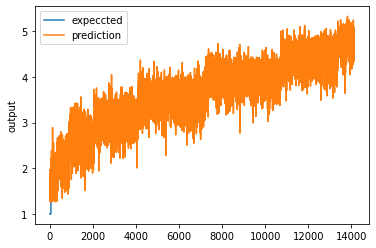

In [ ]:
#Regression chart.
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  a = plt.plot(t['y'].tolist(), label = 'expeccted')
  b = plt.plot(t['pred'].tolist(), label ='prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()
# Plot the chart
chart_regression(pred.flatten(), y_test, sort = True)

In [ ]:
#print out prediction
df_y = pd.DataFrame(merged_df.stars, columns = ['stars'])
df_pred = pd.DataFrame(pred, columns = ['predicted'])
df_y.head()

result = pd.concat([df_y, df_pred], axis = 1)
result.head()

,stars,predicted
0,4.0,4.295877
1,4.0,3.562612
2,4.0,2.938228
3,4.5,3.252643
4,5.0,3.475774


2) Activation: **relu** 
Optimizer: **sgd**

---





In [ ]:
save_path = "./dnn"
tfidf_data = matrix.toarray()
stars = merged_df.stars.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(tfidf_data, stars, test_size=0.20, random_state=42)
checkpointer = ModelCheckpoint(filepath ="./best_weights.hdf5", verbose=0, save_best_only=True)
for i in range(5):
  print(i)
  model = Sequential()
  model.add(Dense(20, input_dim = tfidf_data.shape[1], activation='relu'))
  model.add(Dense(10))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='sgd')
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

  model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor, checkpointer], verbose=2, epochs=1000)

print('Training finished...Loading the best model')
print()
model.load_weights('./best_weights.hdf5')
#Predict
pred = model.predict(x_test)
#RMSE score
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("RMSE score: {}".format(score))

model.save(os.path.join(save_path, "network.hdf5"))

0
Epoch 1/1000
1768/1768 - 4s - loss: 0.3678 - val_loss: 0.1680 - 4s/epoch - 2ms/step
Epoch 2/1000
1768/1768 - 3s - loss: 0.1378 - val_loss: 0.1589 - 3s/epoch - 2ms/step
Epoch 3/1000
1768/1768 - 3s - loss: 0.1203 - val_loss: 0.7863 - 3s/epoch - 2ms/step
Epoch 4/1000
1768/1768 - 3s - loss: 0.1102 - val_loss: 0.1106 - 3s/epoch - 2ms/step
Epoch 5/1000
1768/1768 - 3s - loss: 0.1033 - val_loss: 0.1926 - 3s/epoch - 2ms/step
Epoch 6/1000
1768/1768 - 3s - loss: 0.0984 - val_loss: 0.1132 - 3s/epoch - 2ms/step
Epoch 7/1000
1768/1768 - 3s - loss: 0.0963 - val_loss: 0.2805 - 3s/epoch - 2ms/step
Epoch 8/1000
1768/1768 - 3s - loss: 0.0931 - val_loss: 3.2902 - 3s/epoch - 2ms/step
Epoch 9/1000
1768/1768 - 4s - loss: 0.0919 - val_loss: 0.1360 - 4s/epoch - 2ms/step
Epoch 9: early stopping
1
Epoch 1/1000
1768/1768 - 4s - loss: 0.4232 - val_loss: 0.2819 - 4s/epoch - 2ms/step
Epoch 2/1000
1768/1768 - 3s - loss: 0.1434 - val_loss: 0.4887 - 3s/epoch - 2ms/step
Epoch 3/1000
1768/1768 - 3s - loss: 0.1199 - val

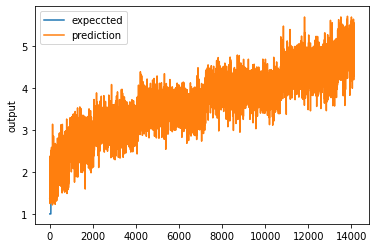

In [ ]:
#Regression chart.
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  a = plt.plot(t['y'].tolist(), label = 'expeccted')
  b = plt.plot(t['pred'].tolist(), label ='prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()
# Plot the chart
chart_regression(pred.flatten(), y_test, sort = True)

In [ ]:
#print out prediction
df_y = pd.DataFrame(merged_df.stars, columns = ['stars'])
df_pred = pd.DataFrame(pred, columns = ['predicted'])
df_y.head()

result = pd.concat([df_y, df_pred], axis = 1)
result.head()

,stars,predicted
0,4.0,4.120787
1,4.0,3.515758
2,4.0,3.116077
3,4.5,3.308887
4,5.0,3.282960


3) Activation: **sigmoid**
Optimizer: **sgd**

In [ ]:
save_path = "./dnn"
tfidf_data = matrix.toarray()
stars = merged_df.stars.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(tfidf_data, stars, test_size=0.20, random_state=42)
checkpointer = ModelCheckpoint(filepath ="./best_weights.hdf5", verbose=0, save_best_only=True)
for i in range(5):
  print(i)
  model = Sequential()
  model.add(Dense(20, input_dim = tfidf_data.shape[1], activation='sigmoid'))
  model.add(Dense(10))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='sgd')
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

  model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor, checkpointer], verbose=2, epochs=1000)

print('Training finished...Loading the best model')
print()
model.load_weights('./best_weights.hdf5')
#Predict
pred = model.predict(x_test)
#RMSE score
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("RMSE score: {}".format(score))

model.save(os.path.join(save_path, "network.hdf5"))

0
Epoch 1/1000
1768/1768 - 4s - loss: 0.6616 - val_loss: 0.6226 - 4s/epoch - 2ms/step
Epoch 2/1000
1768/1768 - 4s - loss: 0.5404 - val_loss: 0.4711 - 4s/epoch - 2ms/step
Epoch 3/1000
1768/1768 - 3s - loss: 0.2987 - val_loss: 0.7086 - 3s/epoch - 2ms/step
Epoch 4/1000
1768/1768 - 3s - loss: 0.1908 - val_loss: 0.3094 - 3s/epoch - 2ms/step
Epoch 5/1000
1768/1768 - 3s - loss: 0.1639 - val_loss: 0.8114 - 3s/epoch - 2ms/step
Epoch 6/1000
1768/1768 - 3s - loss: 0.1493 - val_loss: 0.9133 - 3s/epoch - 2ms/step
Epoch 7/1000
1768/1768 - 4s - loss: 0.1392 - val_loss: 0.2148 - 4s/epoch - 2ms/step
Epoch 8/1000
1768/1768 - 4s - loss: 0.1289 - val_loss: 0.1524 - 4s/epoch - 2ms/step
Epoch 9/1000
1768/1768 - 4s - loss: 0.1237 - val_loss: 0.1071 - 4s/epoch - 2ms/step
Epoch 10/1000
1768/1768 - 4s - loss: 0.1175 - val_loss: 0.3509 - 4s/epoch - 2ms/step
Epoch 11/1000
1768/1768 - 4s - loss: 0.1144 - val_loss: 0.1100 - 4s/epoch - 2ms/step
Epoch 12/1000
1768/1768 - 3s - loss: 0.1105 - val_loss: 0.1035 - 3s/epoc

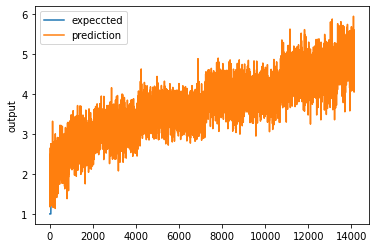

In [ ]:
#Regression chart.
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  a = plt.plot(t['y'].tolist(), label = 'expeccted')
  b = plt.plot(t['pred'].tolist(), label ='prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()
# Plot the chart
chart_regression(pred.flatten(), y_test, sort = True)

In [ ]:
#print out prediction
df_y = pd.DataFrame(merged_df.stars, columns = ['stars'])
df_pred = pd.DataFrame(pred, columns = ['predicted'])
df_y.head()

result = pd.concat([df_y, df_pred], axis = 1)
result.head()

,stars,predicted
0,4.0,4.157626
1,4.0,3.531880
2,4.0,3.243866
3,4.5,3.343433
4,5.0,3.345385
